In [1]:
require('tidyverse')
require('data.table')
#require('rstan')
options(stringsAsFactors=FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



### Look at non-british white population

In [2]:
### read in all the nonWB data and do this!

createCompareDf <- function(trait, disc.dir, valid.dir, suffix=""){
    m_v <- read_tsv(sprintf("%s/ukb24983_v2_hg19.%s_onesex%s.genotyped.glm.linear", valid.dir, trait, suffix) ) 
    f_v <- read_tsv(sprintf("%s/ukb24983_v2_hg19.%s_zerosex%s.genotyped.glm.linear", valid.dir, trait, suffix))

    df_t_train <- read.table(sprintf("%s/m2/snps4_%s.txt", disc.dir, trait), sep=" ", header=TRUE); 
    m_train <- df_t_train %>% filter(category==3) %>% select( -p1, -p2, -p4, -category) %>% rename(post=p3, ID=SNP)
    f_train <- df_t_train %>% filter(category==2) %>% select( -p1, -p3, -p4, -category)%>% rename(post=p2, ID=SNP)
    
    test_valid <- cbind( (f_v %>% select(`#CHROM`, BETA, SE, P) %>% rename(CHR=`#CHROM`, B.f=BETA, SE.f=SE, P.f=P)),
        (m_v %>% select(ID, POS, REF, ALT, BETA, SE, P) %>% rename(B.m=BETA, SE.m=SE, P.m=P)))

    test_valid_filt <- test_valid %>% filter(ID %in% c(f_train$ID, m_train$ID)) %>% 
    mutate(sex=ifelse(ID %in% f_train$ID, "female", "male"), dataset="validation")

    test_valid_filt2 <- test_valid_filt %>% select(-POS, -REF, -ALT)
    test_disc <- rbind(f_train %>% mutate(sex="female"), m_train %>% mutate(sex="male")) %>% mutate(dataset="discovery")


    test_valid_filt3 <- test_valid_filt2 %>% 
    rename(B.f.v=B.f, B.m.v=B.m, SE.f.v=SE.f, SE.m.v=SE.m, P.f.v=P.f, P.m.v=P.m) %>% 
    select(-dataset) 

    train_valid_compare <- full_join(test_disc %>% select(-sex, -dataset), test_valid_filt3 %>% select( -CHR), by="ID")
    return(train_valid_compare)
}



In [6]:
createCompareDf("whr", "../data/1020/","../gwas_valid/") %>% write_csv("../data/res_1023/whr_compare.csv")
createCompareDf("Testosterone", "../data/1020/","../gwas_valid/") %>% write_csv("../data/res_1023/Testosterone_compare.csv")
createCompareDf("trunk_fp", "../data/1020/","../gwas_valid/") %>% write_csv("../data/res_1023/trunk_fp_compare.csv")
createCompareDf("arm_fp", "../data/1020/","../gwas_valid/") %>% write_csv("../data/res_1023/arm_fp_compare.csv")
createCompareDf("leg_fp", "../data/1020/","../gwas_valid/") %>% write_csv("../data/res_1023/leg_fp_compare.csv")


Parsed with column specification:
cols(
  `#CHROM` = col_character(),
  POS = col_integer(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_integer(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)
Parsed with column specification:
cols(
  `#CHROM` = col_character(),
  POS = col_integer(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_integer(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)
Parsed with column specification:
cols(
  `#CHROM` = col_character(),
  POS = col_integer(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_integer(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)
P

In [23]:
testosterone_validNWB <- createCompareDf("Testosterone", "../data/1020/","../gwas_valid/")
testosterone_valid70 <- createCompareDf("Testosterone", "../data/1021/","../gwas1021/", "_valid")

ID,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,post,gene,B.f.v,SE.f.v,P.f.v,B.m.v,SE.m.v,P.m.v,sex
Affx-89023063,7,-0.3322460,0.08086980,3.897580e-03,3.093451e-03,1.02876e-07,0.1459480,0.7788739,TFR2,0.11410700,0.2674830,0.669680,-0.10456200,0.3160490,0.7407730,female
rs10402760,19,-0.0430876,0.01171510,5.808010e-05,5.506694e-05,1.57258e-08,0.1144060,0.9961438,ICAM5,-0.00367127,0.0260193,0.887795,0.05833190,0.0280955,0.0379017,female
rs10462021,1,-0.0278582,0.01164450,2.237385e-05,2.170600e-05,3.88114e-09,0.0124423,0.9916776,PER3,-0.01824610,0.0169669,0.282222,0.01032620,0.0180710,0.5677230,female
rs10981228,9,-0.0395934,0.00332841,4.601831e-05,4.500518e-05,5.34167e-09,0.6197950,0.9986884,SUSD1,-0.03248770,0.0249406,0.192741,-0.01854120,0.0270831,0.4936120,female
rs11090865,22,-0.0364875,0.00414871,3.764203e-05,3.674712e-05,2.73510e-09,0.4937320,0.9990095,TRMU,-0.05236580,0.0214782,0.014780,0.00464506,0.0228181,0.8386940,female
rs11110373,12,-0.0987159,0.01247520,4.013892e-04,3.755573e-04,8.34932e-07,0.5197480,0.9521473,SLC17A8,0.06108960,0.0671754,0.363157,-0.17760000,0.0728125,0.0147398,female


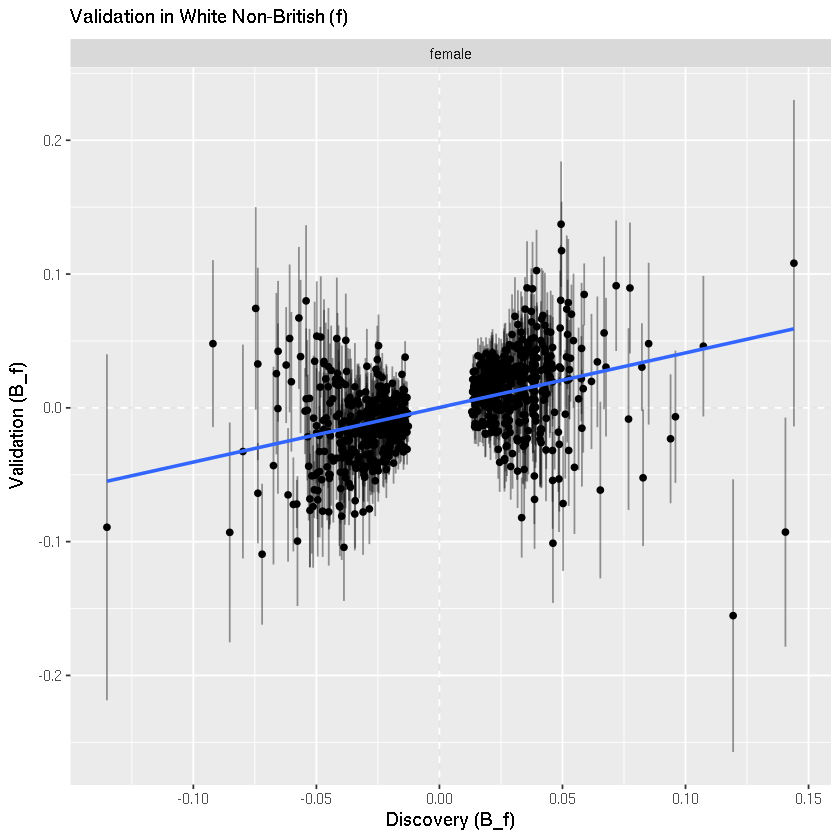

In [4]:
ggplot(whr_validNWB, aes(x=B.f, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.f-SE.f, xmax=B.f+SE.f), alpha=0.4)+xlab("Discovery (B_f)")+ylab("Validation (B_f)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Validation in White Non-British (f)")+ facet_wrap(~sex)


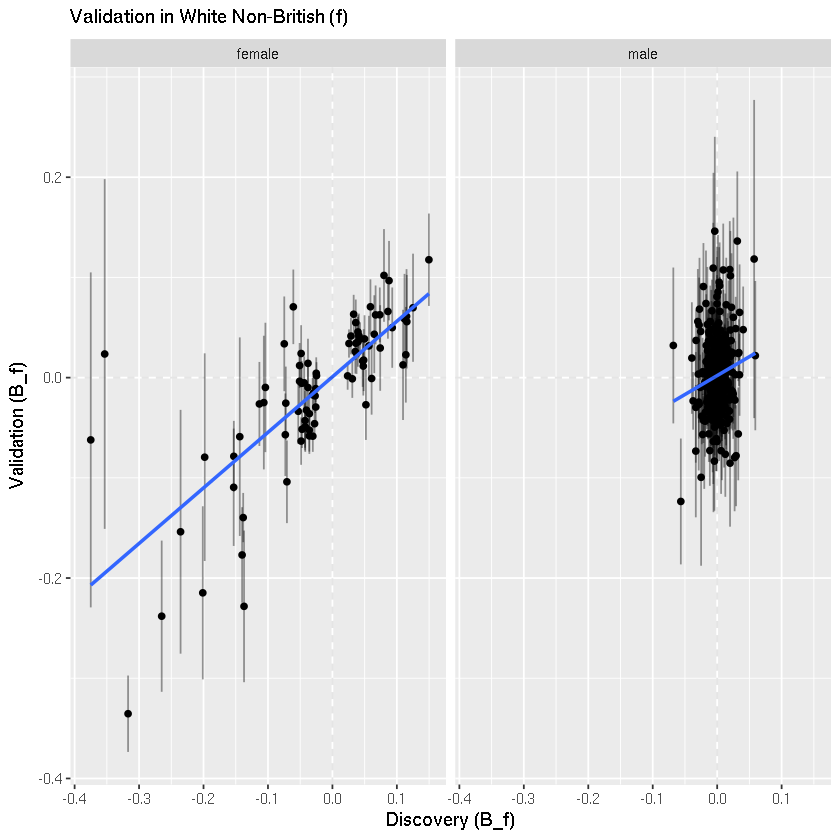

In [44]:
ggplot(testosterone_validNWB, aes(x=B.f, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.f-SE.f, xmax=B.f+SE.f), alpha=0.4)+xlab("Discovery (B_f)")+ylab("Validation (B_f)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Validation in White Non-British (f)")+ facet_wrap(~sex)






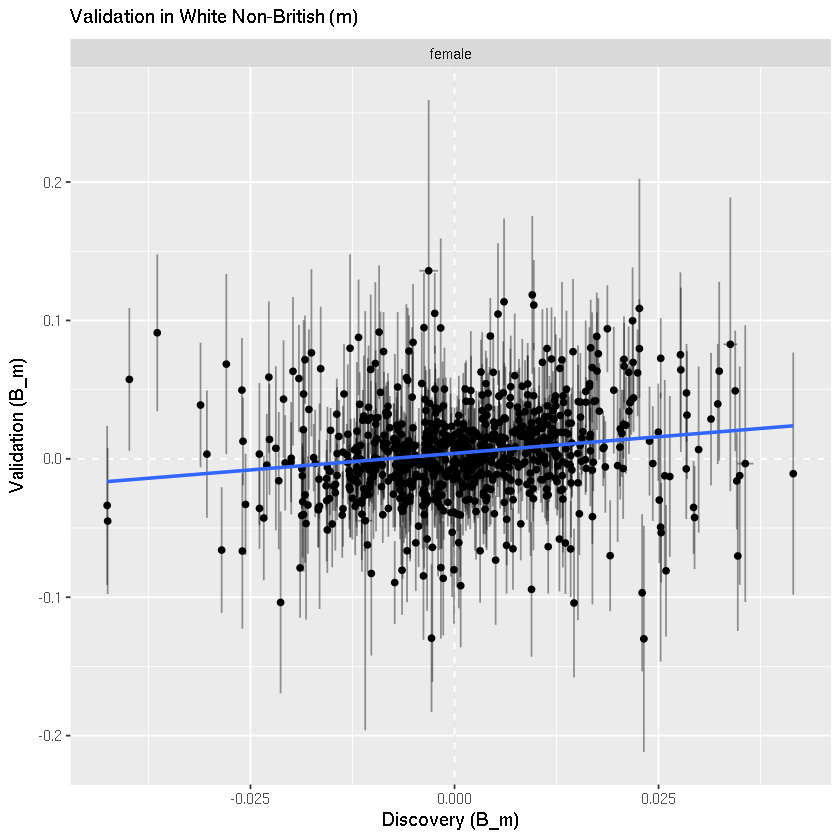

In [5]:
ggplot(whr_validNWB, aes(x=B.m, y=B.m.v))+geom_point()+geom_errorbar(aes(ymin=B.m.v-SE.m.v, ymax=B.m.v+SE.m.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m-SE.m, xmax=B.m+SE.m), alpha=0.4)+xlab("Discovery (B_m)")+ylab("Validation (B_m)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Validation in White Non-British (m)")+facet_wrap(~sex)


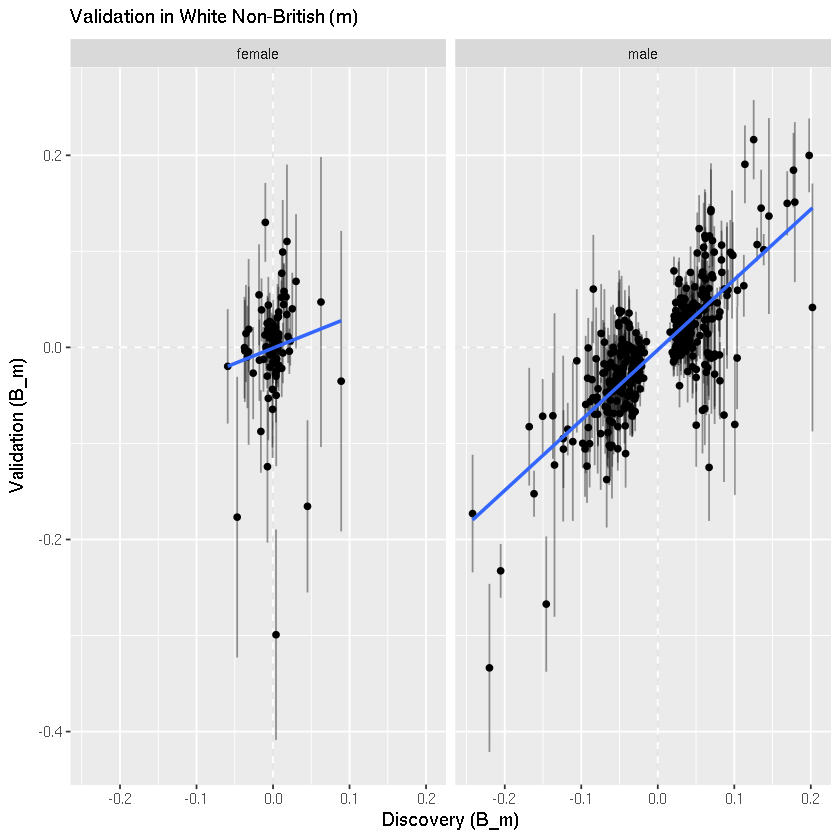

In [45]:
ggplot(testosterone_validNWB, aes(x=B.m, y=B.m.v))+geom_point()+geom_errorbar(aes(ymin=B.m.v-SE.m.v, ymax=B.m.v+SE.m.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m-SE.m, xmax=B.m+SE.m), alpha=0.4)+xlab("Discovery (B_m)")+ylab("Validation (B_m)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Validation in White Non-British (m)")+facet_wrap(~sex)



Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message:
“Removed 580 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 580 rows containing missing values (geom_point).”

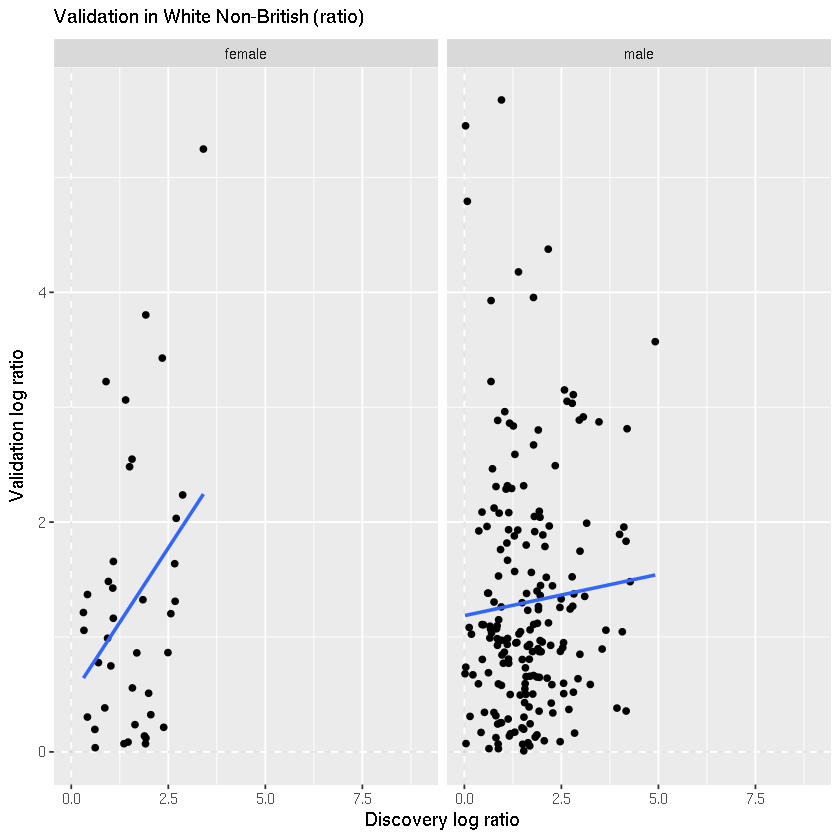

In [48]:
ggplot(testosterone_validNWB, aes(x=abs(log(B.m/B.f)), y=abs(log(B.m.v/B.f.v))))+geom_point()+
xlab("Discovery log ratio")+ylab("Validation log ratio") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1) +ggtitle("Validation in White Non-British (ratio)")+facet_wrap(~sex)

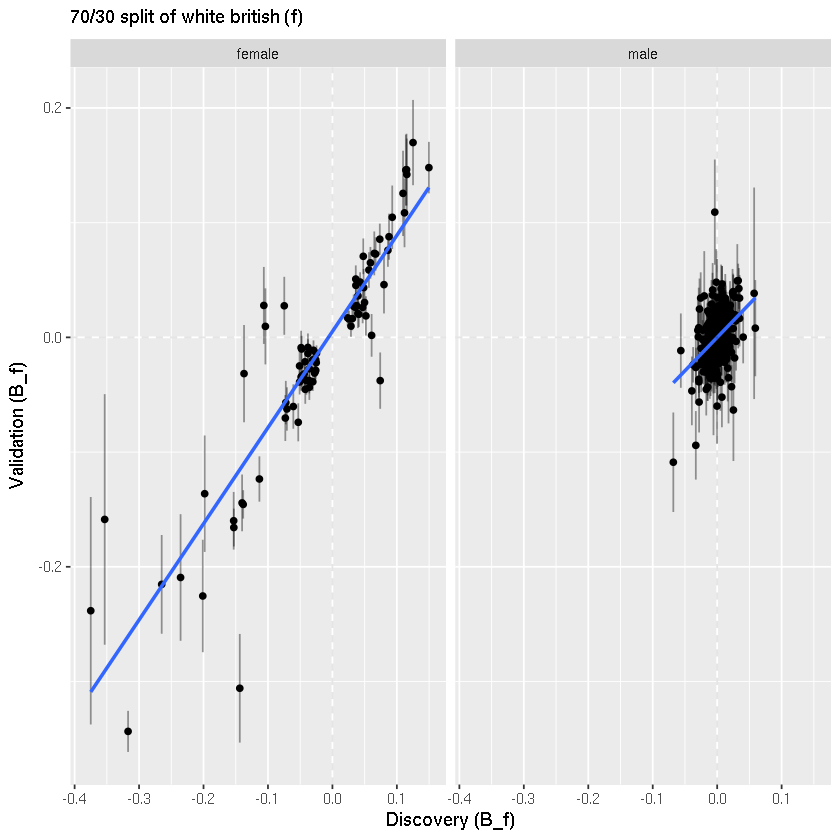

In [50]:
ggplot(testosterone_valid70, aes(x=B.f, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.f-SE.f, xmax=B.f+SE.f), alpha=0.4)+xlab("Discovery (B_f)")+ylab("Validation (B_f)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("70/30 split of white british (f)")+facet_wrap(~sex)

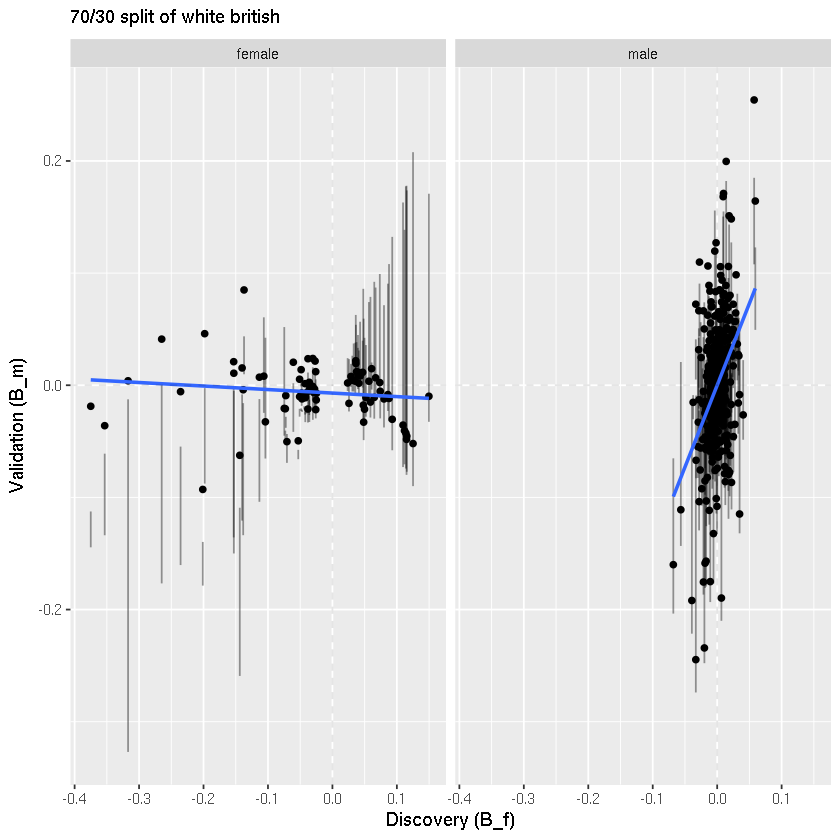

In [51]:
ggplot(testosterone_valid70, aes(x=B.f, y=B.m.v))+geom_point()+geom_errorbar(aes(ymin=B.m.v-SE.m.v, ymax=B.f.v+SE.m.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.f-SE.f, xmax=B.f+SE.f), alpha=0.4)+xlab("Discovery (B_f)")+ylab("Validation (B_m)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("70/30 split of white british")+facet_wrap(~sex)

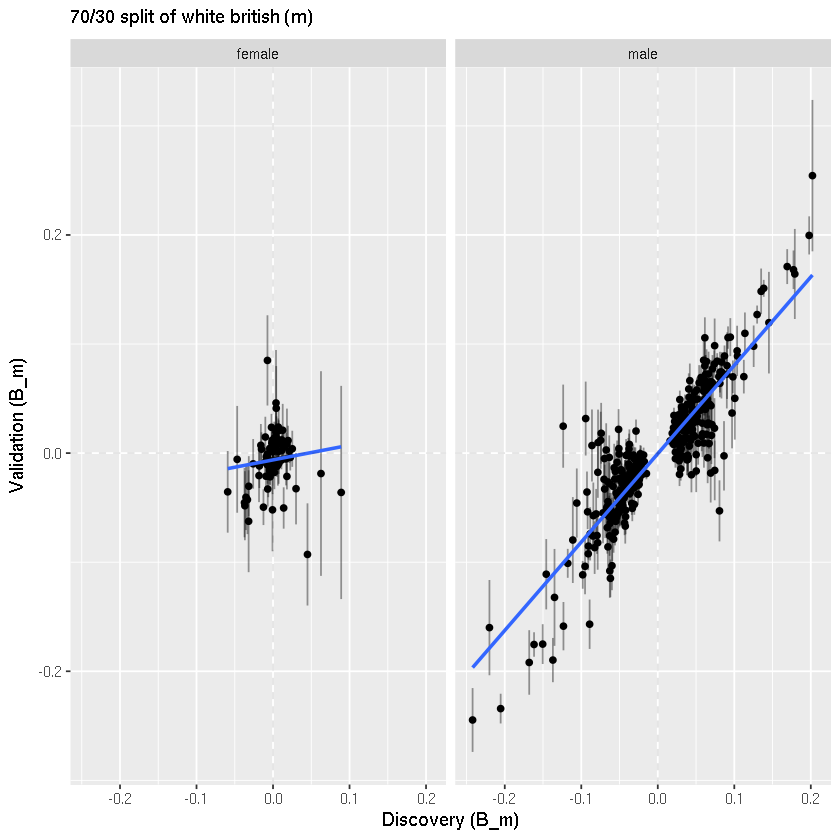

In [52]:
ggplot(testosterone_valid70, aes(x=B.m, y=B.m.v))+geom_point()+geom_errorbar(aes(ymin=B.m.v-SE.m.v, ymax=B.m.v+SE.m.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m-SE.m, xmax=B.m+SE.m), alpha=0.4)+xlab("Discovery (B_m)")+ylab("Validation (B_m)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("70/30 split of white british (m)")+ facet_wrap(~sex)

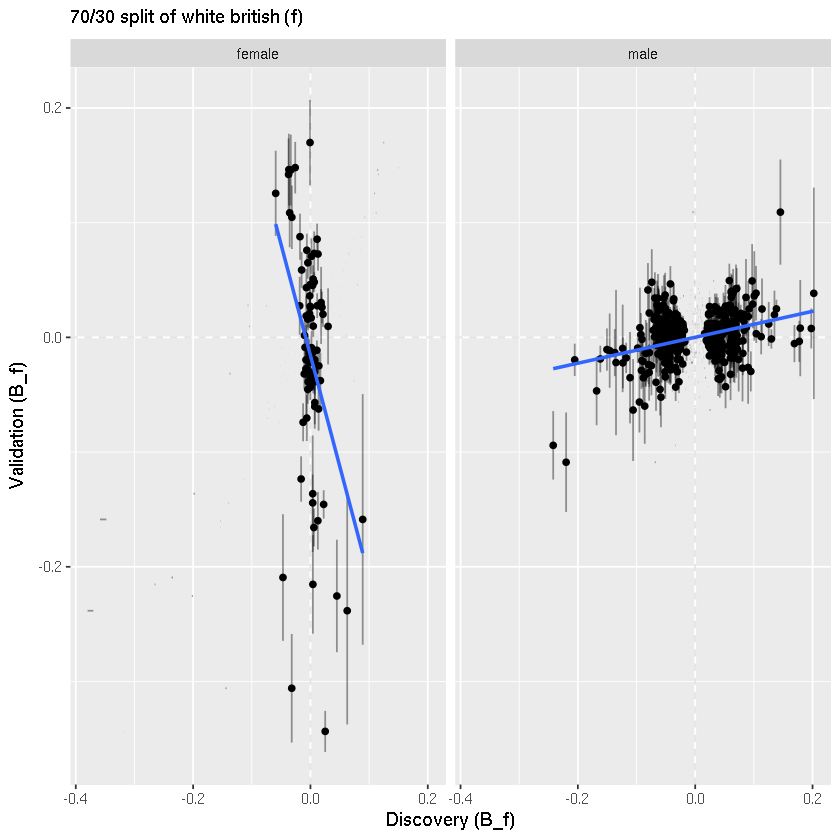

In [53]:
ggplot(testosterone_valid70, aes(x=B.m, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.f-SE.f, xmax=B.f+SE.f), alpha=0.4)+xlab("Discovery (B_f)")+ylab("Validation (B_f)") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("70/30 split of white british (f)") +facet_wrap(~sex)

Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message in log(B.m/B.f):
“NaNs produced”Warning message in log(B.m.v/B.f.v):
“NaNs produced”Warning message:
“Removed 285 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 285 rows containing missing values (geom_point).”

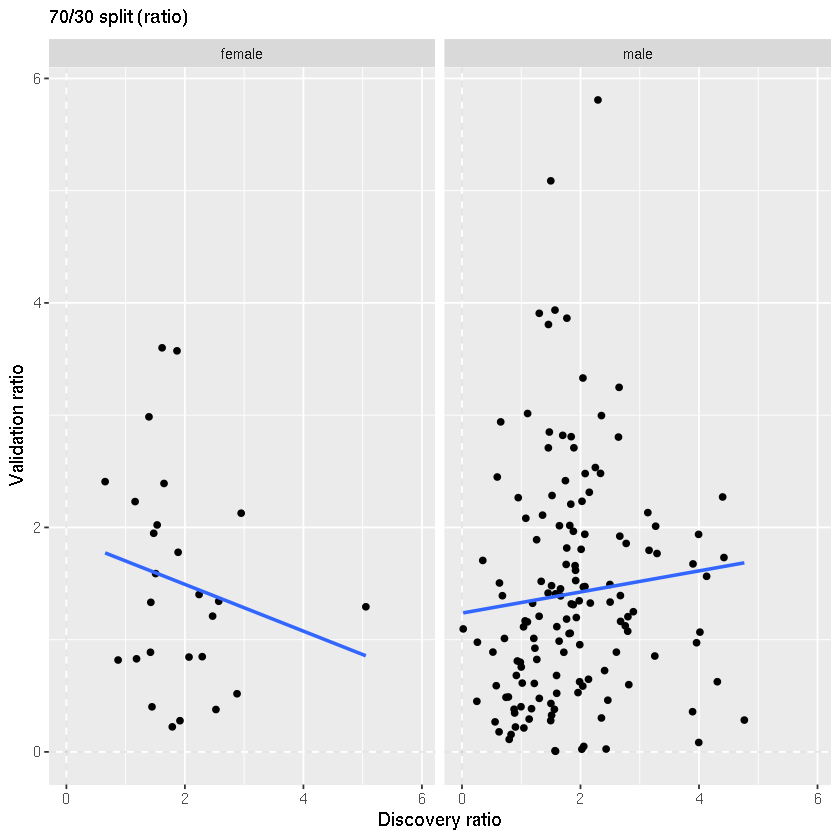

In [54]:
ggplot(testosterone_valid70, aes(x=abs(log(B.m/B.f)), y=abs(log(B.m.v/B.f.v))))+geom_point()+
xlab("Discovery ratio")+ylab("Validation ratio") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1) +ggtitle("70/30 split (ratio)")+facet_wrap(~sex)

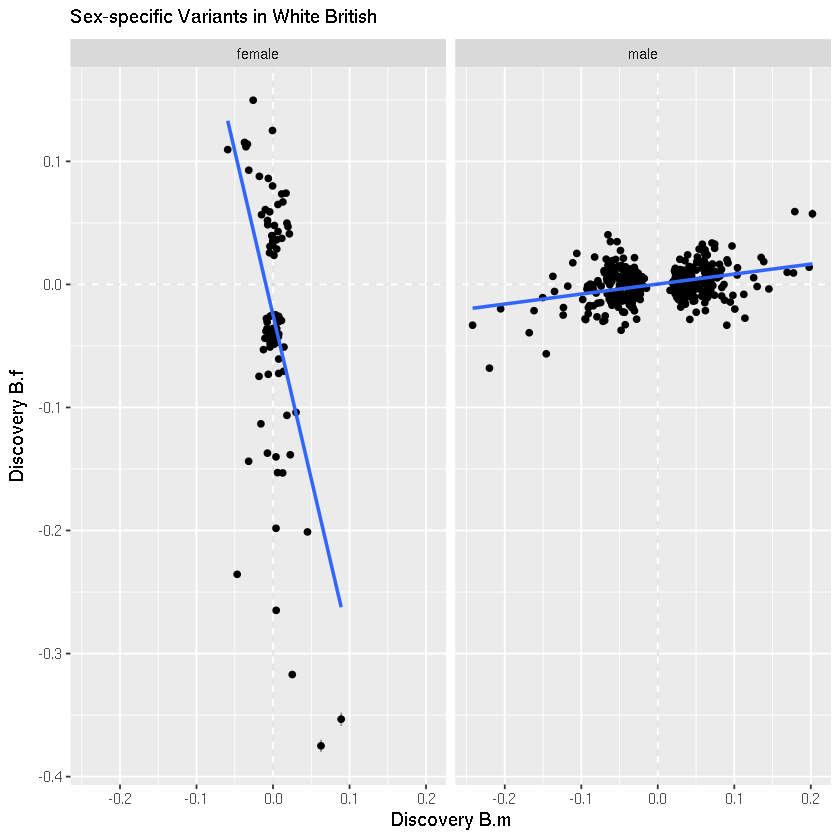

In [42]:
ggplot(testosterone_validNWB, aes(x=B.m, y=B.f))+geom_point()+geom_errorbar(aes(ymin=B.f-SE.f, ymax=B.f+SE.f), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m-SE.m, xmax=B.m+SE.m), alpha=0.4)+xlab("Discovery B.m")+ylab("Discovery B.f") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Sex-specific Variants in White British")+facet_wrap(~sex)




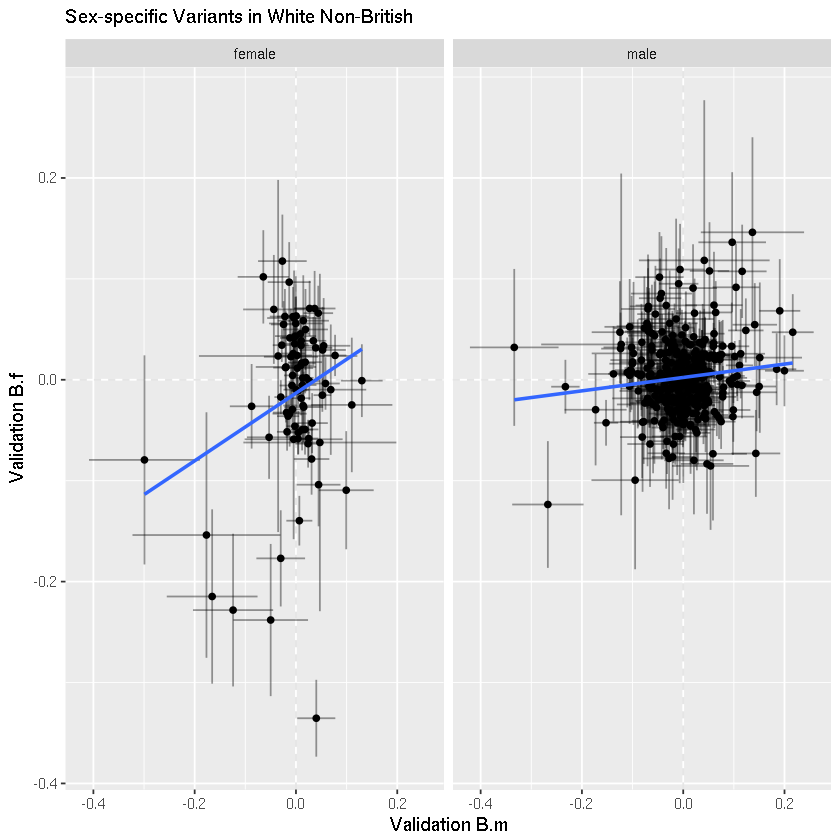

In [41]:
ggplot(testosterone_validNWB, aes(x=B.m.v, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m.v-SE.m.v, xmax=B.m.v+SE.m.v), alpha=0.4)+xlab("Validation B.m")+ylab("Validation B.f") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Sex-specific Variants in White Non-British")+facet_wrap(~sex)




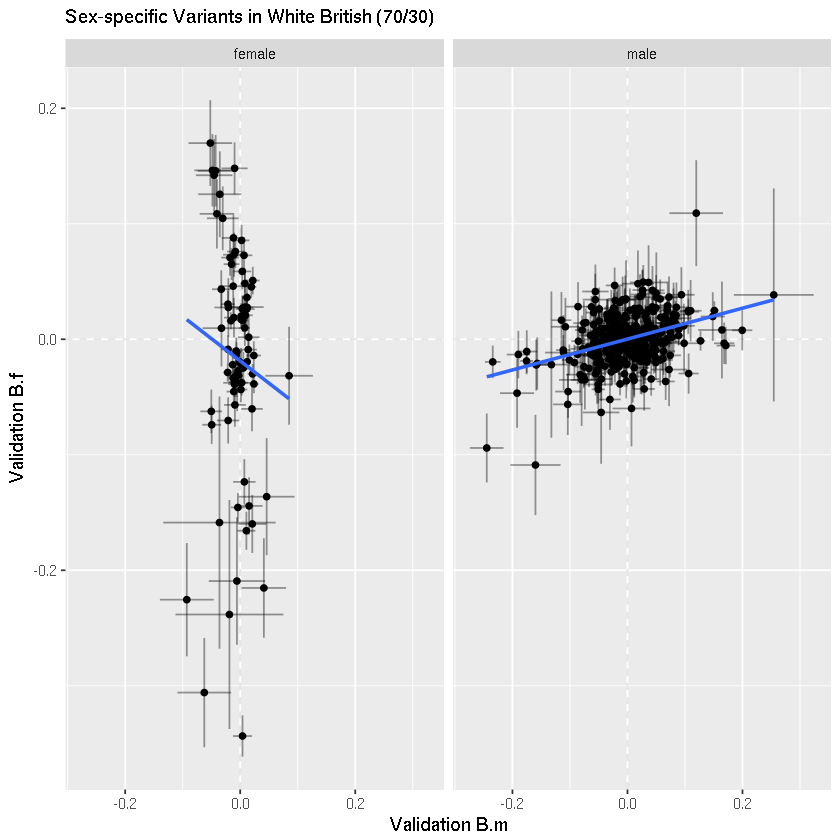

In [55]:
ggplot(testosterone_valid70, aes(x=B.m.v, y=B.f.v))+geom_point()+geom_errorbar(aes(ymin=B.f.v-SE.f.v, ymax=B.f.v+SE.f.v), alpha=0.4)+
geom_errorbarh(aes(xmin=B.m.v-SE.m.v, xmax=B.m.v+SE.m.v), alpha=0.4)+xlab("Validation B.m")+ylab("Validation B.f") +
geom_smooth(method = "lm", se = FALSE)+geom_hline(yintercept=0, linetype=2, alpha=0.1)+
geom_vline(xintercept=0, linetype=2, alpha=0.1)+ggtitle("Sex-specific Variants in White British (70/30)")+facet_wrap(~sex)

